In [1]:
# Derivada primeira método forward difference
def derivadafd(hs, fx, fxsh):
  f1 = (1/hs)*(fxsh-fx)
  return f1

# Derivada primeira método backward difference
def derivadabd(hs, fx, fxmh):
  f1 = (1/hs)*(fx-fxmh)
  return f1

# Derivada primeira método central difference
def derivadacd(hs, fxsh, fxmh):
  f1 = (1/(2*hs))*(fxsh-fxmh)
  return f1

# Derivada primeira método central difference 5 points
def derivadacd5(hs, fxm2h, fxmh, fxsh, fxs2h):
  f1 = (1/(12*hs))*((fxm2h)-(8*fxmh)+(8*fxsh)-(fxs2h))
  return f1

# Derivada segunda
def derivada2f(hs, fxmh, fx, fxsh):
  f2 = ((fxmh) - (2*fx) + (fxsh))/(hs**2)
  return f2

**Questão 1**

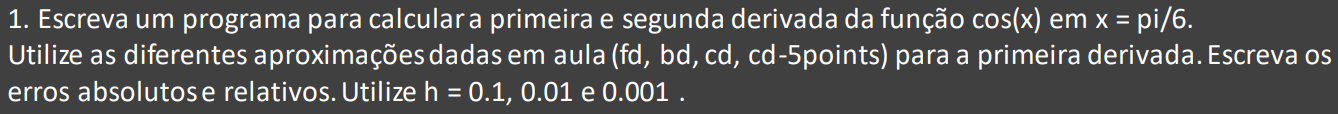

In [ ]:
import numpy as np

x = np.pi/6

h = [0.1,0.01,0.001]

f1real = -1*np.sin(x)

for i in h:
  # Definindo as funções
  fx = np.cos(x)
  fxsh = np.cos(x+i)
  fxmh = np.cos(x-i)
  fxm2h = np.cos(x-(2*i))
  fxs2h = np.cos(x+(2*i))
  # Aplicando as funções em cada método
  f1fd = derivadafd(i, fx, fxsh)
  f1bd = derivadabd(i, fx, fxmh)
  f1cd = derivadacd(i, fxsh, fxmh)
  f1cd5 = derivadacd5(i, fxm2h, fxmh, fxsh, fxs2h)
  # Calculando os erros absolutos e relativos de Forward Difference
  erroabsolutof1fd = np.abs(f1fd) - np.abs(f1real)
  errorelativof1fd = (np.abs(f1fd) - np.abs(f1real))/np.abs(f1fd)
  # Calculando os erros absolutos e relativos de Backward Difference
  erroabsolutof1bd = np.abs(f1bd) - np.abs(f1real)
  errorelativof1bd = (np.abs(f1bd) - np.abs(f1real))/np.abs(f1bd)
  # Calculando os erros absolutos e relativos de Central Difference
  erroabsolutof1cd = np.abs(f1cd) - np.abs(f1real)
  errorelativof1cd = (np.abs(f1cd) - np.abs(f1real))/np.abs(f1cd)
  # Calculando os erros absolutos e relativos de Central Difference 5 Points
  erroabsolutof1cd5 = np.abs(f1cd5) - np.abs(f1real)
  errorelativof1cd5 = (np.abs(f1cd5) - np.abs(f1real))/np.abs(f1cd5)
  print('Sendo h = %.3f,' %(i))
  print('A derivada primeira pelo método Forward Difference, é %.20f, ERRO ABSOLUTO = %.20f, ERRO RELATIVO = %.20f' %(f1fd, erroabsolutof1fd, errorelativof1fd))
  print('A derivada primeira pelo método Backward Difference, é %.20f, ERRO ABSOLUTO = %.20f, ERRO RELATIVO = %.20f' %(f1bd, erroabsolutof1bd, errorelativof1bd))
  print('A derivada primeira pelo método Central Difference, é %.20f, ERRO ABSOLUTO = %.20f, ERRO RELATIVO = %.20f' %(f1cd, erroabsolutof1cd, errorelativof1cd))
  print('A derivada primeira pelo método Central Difference 5 Points, é %.20f, ERRO ABSOLUTO = %.20f, ERRO RELATIVO = %.20f' %(f1cd5, erroabsolutof1cd5, errorelativof1cd5))
  print('--------------------------------------------------------------------------------------------------------------')

Sendo h = 0.100,
A derivada primeira pelo método Forward Difference, é -0.54243228105752105961, ERRO ABSOLUTO = 0.04243228105752111512, ERRO RELATIVO = 0.07822595103446926268
A derivada primeira pelo método Backward Difference, é -0.45590188541075993278, ERRO ABSOLUTO = -0.04409811458924001171, ERRO RELATIVO = -0.09672720381383892452
A derivada primeira pelo método Central Difference, é -0.49916708323414049620, ERRO ABSOLUTO = -0.00083291676585944829, ERRO RELATIVO = -0.00166861316347808610
A derivada primeira pelo método Central Difference 5 Points, é -0.49999833531630266670, ERRO ABSOLUTO = -0.00000166468369727779, ERRO RELATIVO = -0.00000332937847927974
--------------------------------------------------------------------------------------------------------------
Sendo h = 0.010,
A derivada primeira pelo método Forward Difference, é -0.50432175764298925458, ERRO ABSOLUTO = 0.00432175764298931009, ERRO RELATIVO = 0.00856944515578226228
A derivada primeira pelo método Backward Differen

**Questão 2**

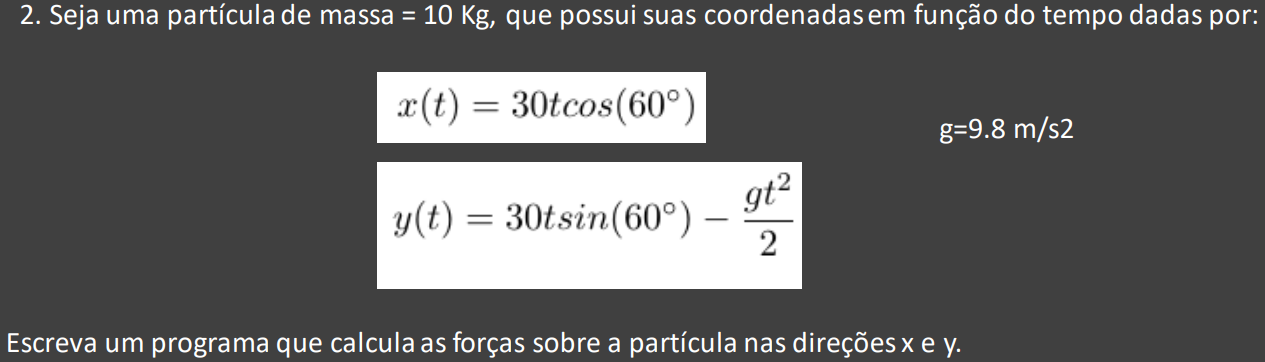

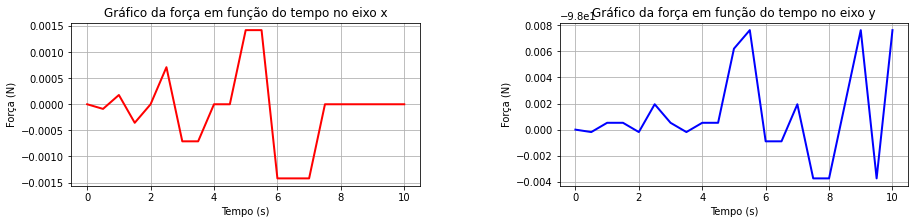

In [2]:
import matplotlib.pyplot as plt
import numpy as np

#Definindo as propriedades do sistema
m = 10
g = 9.8
#Definindo a precisão com 10 casas decimais
h = 0.00001

#Definindo listas para plotar os gráficos da força em função do tempo
t = [0]
Fxt = []
Fyt = []

#Criando uma lista com valores de tempo de 0.5 em 0.5 segundos
k = 0
while t[-1] <= 10:
  k += 1
  t.append(k*0.5)
  
t.pop()

#Definindo as funções com (t+h) e (t-h), e calculando a força pela derivada segunda da função da posição
for i in t:
  xt = 30 * np.cos(np.pi/3) * i
  yt = (30 * np.sin(np.pi/3) * i) - ((g*(i**2))/2)

  xtmh = 30 * np.cos(np.pi/3) * (i-h)
  ytmh = (30 * np.sin(np.pi/3) * (i-h)) - ((g*((i-h)**2))/2)

  xtsh = 30 * np.cos(np.pi/3) * (i+h)
  ytsh = (30 * np.sin(np.pi/3) * (i+h)) - ((g*((i+h)**2))/2)

  Fxt.append(derivada2f(h, xtmh, xt, xtsh) * m)
  Fyt.append(derivada2f(h, ytmh, yt, ytsh) * m)

#Definindo propriedades do Figure (1x2)
fig, axes = plt.subplots(1,2, figsize=(15,3))

#Primeiro Gráfico
axes[0].plot(t,Fxt,color='red',lw=2)
axes[0].set_title('Gráfico da força em função do tempo no eixo x')
axes[0].set_xlabel('Tempo (s)')
axes[0].set_ylabel('Força (N)')
axes[0].grid()

#Segundo Gráfico
axes[1].plot(t,Fyt,color='blue',lw=2)
axes[1].set_title('Gráfico da força em função do tempo no eixo y')
axes[1].set_xlabel('Tempo (s)')
axes[1].set_ylabel('Força (N)')
axes[1].grid()

#Espaçamento entre gráficos

plt.subplots_adjust(wspace=0.4)

#O primeiro gráfico mostra que a força no eixo x é aproximadamente 0 N para qualquer instante de tempo, sujeito a imprecisões
#O segundo gráfico mostra que a força no eixo x é aproximadamente -98 N para qualquer instante de tempo, sujeito a imprecisões
plt.show()

In [ ]:
#Valores da força no eixo y em lista
Fyt

[-97.99999999872409,
 -98.00018574424028,
 -97.99947520150452,
 -97.99947520150452,
 -98.00018574424028,
 -97.998054116033,
 -97.99947520150452,
 -98.00018574424028,
 -97.99947520150452,
 -97.99947520150452,
 -97.99379085961844,
 -97.99236977414692,
 -98.00089628697604,
 -98.00089628697604,
 -97.998054116033,
 -98.00373845791908,
 -98.00373845791908,
 -97.998054116033,
 -97.99236977414692,
 -98.00373845791908,
 -97.99236977414692]

In [ ]:
#Valores da força no eixo x em lista
Fxt

[0.0,
 -8.881784197001251e-05,
 0.00017763568394002502,
 -0.00035527136788005004,
 0.0,
 0.0007105427357601001,
 -0.0007105427357601001,
 -0.0007105427357601001,
 0.0,
 0.0,
 0.0014210854715202002,
 0.0014210854715202002,
 -0.0014210854715202002,
 -0.0014210854715202002,
 -0.0014210854715202002,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]